In [1]:
import os
import json

In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
import rasterio as rio
from rasterio.plot import show
from rasterstats import zonal_stats

In [4]:
import osmnx as ox
import geopandas as gpd

In [5]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [6]:
import pandas as pd
from pandas import DataFrame
from geopandas import GeoDataFrame
import seaborn as sbn

In [7]:
import numpy
import matplotlib.pyplot as plt

In [8]:
## Import EVI satellite image
os.chdir("C:/Users/amy/Documents/GBS/exposures/final_data/ndvi")
image_file = "ndvi_wales_2012.tif"
sat_data = rio.open(image_file)

In [9]:
## Import buffer shapefile as a dataframe
df = GeoDataFrame.from_file("C:/Users/amy/Documents/GBS/exposures/final_data/wales_addresses_buffered_wimd.shp")

In [10]:
##dfb = GeoDataFrame.from_file("C:/Users/amy/Documents/GBS/exposures/sample_buff.shp")

In [11]:
from osgeo import gdal
import numpy as np

ds = gdal.Open("ndvi_wales_2012.tif")
band =  ds.GetRasterBand(1)
array = np.array(band.ReadAsArray())
values = np.unique(array)

In [12]:
print (values)

[-1.3475311e+00 -1.1458733e+00 -1.0571976e+00 ...  9.0245467e-01
  9.5866895e-01  3.4028235e+38]


In [12]:
##Calculate zonal stats for home buffers for a single satellite image
stats = zonal_stats(df,"ndvi_wales_2012.tif", stats=['min','mean', 'max', 'median'], nodata= None, geojson_out=True)

In [13]:
stats[0]['type']

'Feature'

In [14]:
stats[0]

{'id': '0',
 'type': 'Feature',
 'properties': {'classifica': 'RD06',
  'end_date': None,
  'entry_date': '2005-04-13',
  'last_updat': '2016-02-10',
  'local_auth': 'Wrexham',
  'lsoa': 'W01000409',
  'lsoa_name': 'Wrexham 017E',
  'start_date': '2008-01-18',
  'uprn': 100100864090.0,
  'wimd_quint': 1.0,
  'min': 0.0,
  'max': 0.0,
  'mean': 0.0,
  'median': 0.0},
 'geometry': {'type': 'Polygon',
  'coordinates': (((329278.15, 343446.26),
    (329272.385584121, 343387.7329033952),
    (329255.3138597534, 343331.4549702905),
    (329227.5908836908, 343279.58893009415),
    (329190.282034356, 343234.12796564406),
    (329144.8210699059, 343196.8191163092),
    (329092.95502970956, 343169.0961402466),
    (329036.67709660484, 343152.02441587904),
    (328978.15, 343146.26),
    (328919.6229033952, 343152.02441587904),
    (328863.3449702905, 343169.0961402466),
    (328811.47893009416, 343196.8191163092),
    (328766.0179656441, 343234.12796564406),
    (328728.70911630924, 343279.58893

In [15]:
type(stats), len(stats)

(list, 1498120)

In [16]:
stats_gdf = GeoDataFrame.from_features(stats)
stats_gdf.head(2)

,geometry,classifica,end_date,entry_date,last_updat,local_auth,lsoa,lsoa_name,start_date,uprn,wimd_quint,min,max,mean,median
0,"POLYGON ((329278.150 343446.260, 329272.386 34...",RD06,None,2005-04-13,2016-02-10,Wrexham,W01000409,Wrexham 017E,2008-01-18,1.001009e+11,1.0,0.0,0.0,0.0,0.0
1,"POLYGON ((329224.680 343494.120, 329218.916 34...",RD04,None,2005-04-13,2016-02-10,Wrexham,W01000409,Wrexham 017E,2008-01-18,1.001009e+11,1.0,0.0,0.0,0.0,0.0


In [17]:
import seaborn as sbn

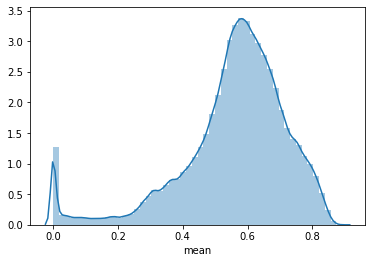

In [19]:
sbn.distplot(stats_gdf['mean'])

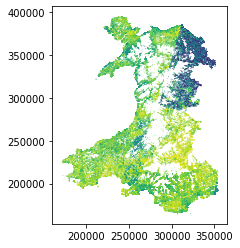

In [21]:
stats_gdf.plot(column='mean')

In [20]:
stats_gdf.to_csv("ndvi_zonal_stats_2019.csv")

In [30]:
import arcpy
import numpy

# Get input Raster properties
inRas = arcpy.Raster('D:/Landsat/2018 Summer/Landsat 8/testing/evi_clouds_removed')
lowerLeft = arcpy.Point(inRas.extent.XMin,inRas.extent.YMin)
cellSize = ras.meanCellWidth

# Convert Raster to numpy array
arr = arcpy.RasterToNumPyArray(inRas,nodata_to_value=-9999)

# Calculate percentage of the row for each cell value
arrSum = arr.sum(1)
arrSum.shape = (arr.shape[0],1)
arrPerc = (arr)/arrSum

#Convert Array to raster (keep the origin and cellsize the same as the input)
newRaster = arcpy.NumPyArrayToRaster(arrPerc,lowerLeft,cellSize,
                                     value_to_nodata=-9999)
newRaster.save("D:/Landsat/2018 Summer/Landsat 8/testing/PercentRaster")

ModuleNotFoundError: No module named 'arcpy'